In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from numpy import random
from numpy import matlib
import matplotlib.pyplot as plt
import math
import InitialPoint, Problem, Schedule, Trip
import warnings
from itertools import permutations
import copy
import importlib
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
importlib.reload(Trip);
importlib.reload(Schedule);
importlib.reload(Problem);

In [3]:
n = 10000
gifts = pd.read_csv('gifts.csv')
gifts = gifts[:n]
greedy_clustering = InitialPoint.get_initial_solution(gifts.copy())[['GiftId', 'TripId']]

In [ ]:
problem=Problem.Problem(gifts, greedy_clustering)
schedule10000, objs10000=simulated_annealing(problem, greedy_clustering, verbose=False, T=1000, mu=1.00002, max_iter=100001)

In [3]:
n = 1000
gifts = pd.read_csv('gifts.csv')
gifts = gifts[:n]
greedy_clustering = InitialPoint.get_initial_solution(gifts.copy())[['GiftId', 'TripId']]

In [4]:
problem=Problem.Problem(gifts, greedy_clustering)

In [5]:
greedy_solution = problem.Greedy_solver()
random_solution = problem.Randomize_solver()

In [5]:
def simulated_annealing(problem, init_solution, T=10000, mu=1.0002, T_stop=1e+2, max_iter=100000+1, verbose=False):
    schedule = Schedule.Schedule(problem, init_solution)
    n_iter = 0
    objs = []
    while T>T_stop and n_iter < max_iter:
        schedule.do_random_move(T, verbose)
        if n_iter%10000 == 0:
            objs.append((n_iter, schedule.best_wrw))
            print(n_iter, T, schedule.get_total_wrw())
        if n_iter%10 == 0:
            T/=mu
        n_iter+=1
    return schedule, objs

In [11]:
schedule1000, objs1000=simulated_annealing(problem, greedy_solution, verbose=False, T=1000, mu=1.00002, max_iter=100001)

0 1000 252444631.299
5000 990.0499327528815 140619899.997
10000 980.1988693439846 139541856.654
15000 970.4458246784616 139255974.229
20000 960.7898234632249 138901723.769
25000 951.2299001094186 138620011.388
30000 941.7650986358602 138468740.523
35000 932.3944725734439 138405351.352
40000 923.1170848704962 138304983.791
45000 913.932007799071 138301290.129
50000 904.8383228621767 138302574.599
55000 895.8351207019278 138193217.281
60000 886.9215010086132 138158890.191
65000 878.0965724306633 138095360.386
70000 869.359452485514 138072734.36
75000 860.7092674713641 137966461.332
80000 852.1451523798047 137838805.74
85000 843.6662508093186 137749605.258
90000 835.2717148796414 137716417.797
95000 826.9607051469736 137701761.144
100000 818.7323905200365 137674281.735


In [13]:
schedule1000.best_wrw

137673225.88437253

In [14]:
len(schedule1000.best_trips)

96

In [239]:
df1000 = schedule1000.export_to_pandas()
df1000.to_csv('sa_1000.csv')

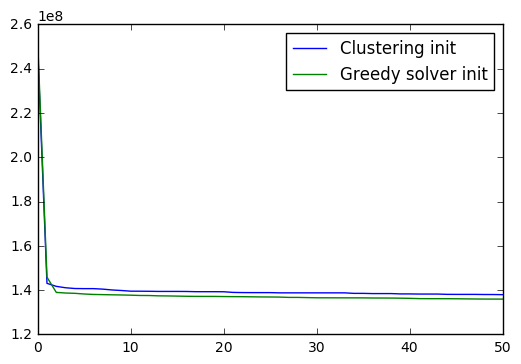

In [71]:
# plt.ylim((130000000, objs1000[0][1]))
plt.plot(np.array(objs1000).T[1], label='Clustering init')
plt.plot(np.array(objs1000_greedy).T[1], label='Greedy solver init')
plt.legend(loc=0, numpoints = 1)
plt.show()

In [16]:
n = 100
gifts = pd.read_csv('gifts.csv')
gifts = gifts[:n]
sample_submission= pd.read_csv('sample_submission.csv')[:n]
greedy_clustering = InitialPoint.get_initial_solution(gifts.copy())[['GiftId', 'TripId']]

In [21]:
schedule100, objs100=simulated_annealing(problem, greedy_clustering, verbose=False, T=2000, mu=1.00002, max_iter=200001)

0 2000 106651445.689
10000 1960.3977386879692 14961298.2456
20000 1921.5796469264499 14707772.1146
30000 1883.5301972717205 14612910.8964
40000 1846.2341697409925 14398122.397
50000 1809.6766457243534 14369053.5256
60000 1773.8430020172264 14369053.5256
70000 1738.718904971028 14371970.5021
80000 1704.2903047596094 14370750.4152
90000 1670.5434297592828 14370683.9572
100000 1637.464781040073 14243186.9013
110000 1605.0411269660756 14241966.8144
120000 1573.2594979027424 14240306.6897
130000 1542.1071810289484 14237729.3098
140000 1511.5717152518168 14237729.3098
150000 1481.640886222177 14237729.3098
160000 1452.3027214487997 14237729.3098
170000 1423.5454855093087 14237729.3098
180000 1395.3576753559557 14237729.3098
190000 1367.728015714361 14237729.3098
200000 1340.6454545733097 14237729.3098


In [24]:
schedule100.best_wrw

14237729.309835013

In [25]:
n = 50
gifts = pd.read_csv('gifts.csv')
gifts = gifts[:n]
sample_submission= pd.read_csv('sample_submission.csv')[:n]
greedy_clustering = InitialPoint.get_initial_solution(gifts.copy())[['GiftId', 'TripId']]

In [30]:
schedule50, objs50=simulated_annealing(problem, greedy_clustering, verbose=False, T=10000, mu=1.00002, max_iter=200001)

0 10000 73286542.6126
10000 9801.988693439864 8045568.82734
20000 9607.898234632286 7899380.74527
30000 9417.650986358634 7954064.52562
40000 9231.170848705013 7767865.40401
50000 9048.383228621798 7852299.27647
60000 8869.215010086167 7790000.71001
70000 8693.59452485517 7790779.379
80000 8521.451523798065 7793544.46389
90000 8352.71714879647 7801114.30917
100000 8187.323905200416 7865110.62117
110000 8025.205634830443 7859439.45473
120000 7866.29748951378 7854793.11528
130000 7710.535905144844 7797929.37342
140000 7557.858576259174 7803504.91374
150000 7408.204431110979 7766663.07511
160000 7261.513607244083 7736684.16219
170000 7117.727427546607 7715101.73661
180000 6976.7883767798585 7715101.73661
190000 6838.640078571868 7745913.09711
200000 6703.227272866611 7715101.73661


In [32]:
schedule50.best_wrw

7705145.7066903505